# Customer Segmentation using K-Mean Clustering

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

# Importing the dataset


In [3]:
df = pd.read_csv("C:/Users/Dharini/Downloads/Mall_Customers.csv")

# Data Anlaysis

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* Conclusions

1. No Null Value
2. Gender has the dtype of object, which needs to be converted

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Conclusions

1. Avg. age of Customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

<AxesSubplot: xlabel='Age', ylabel='count'>

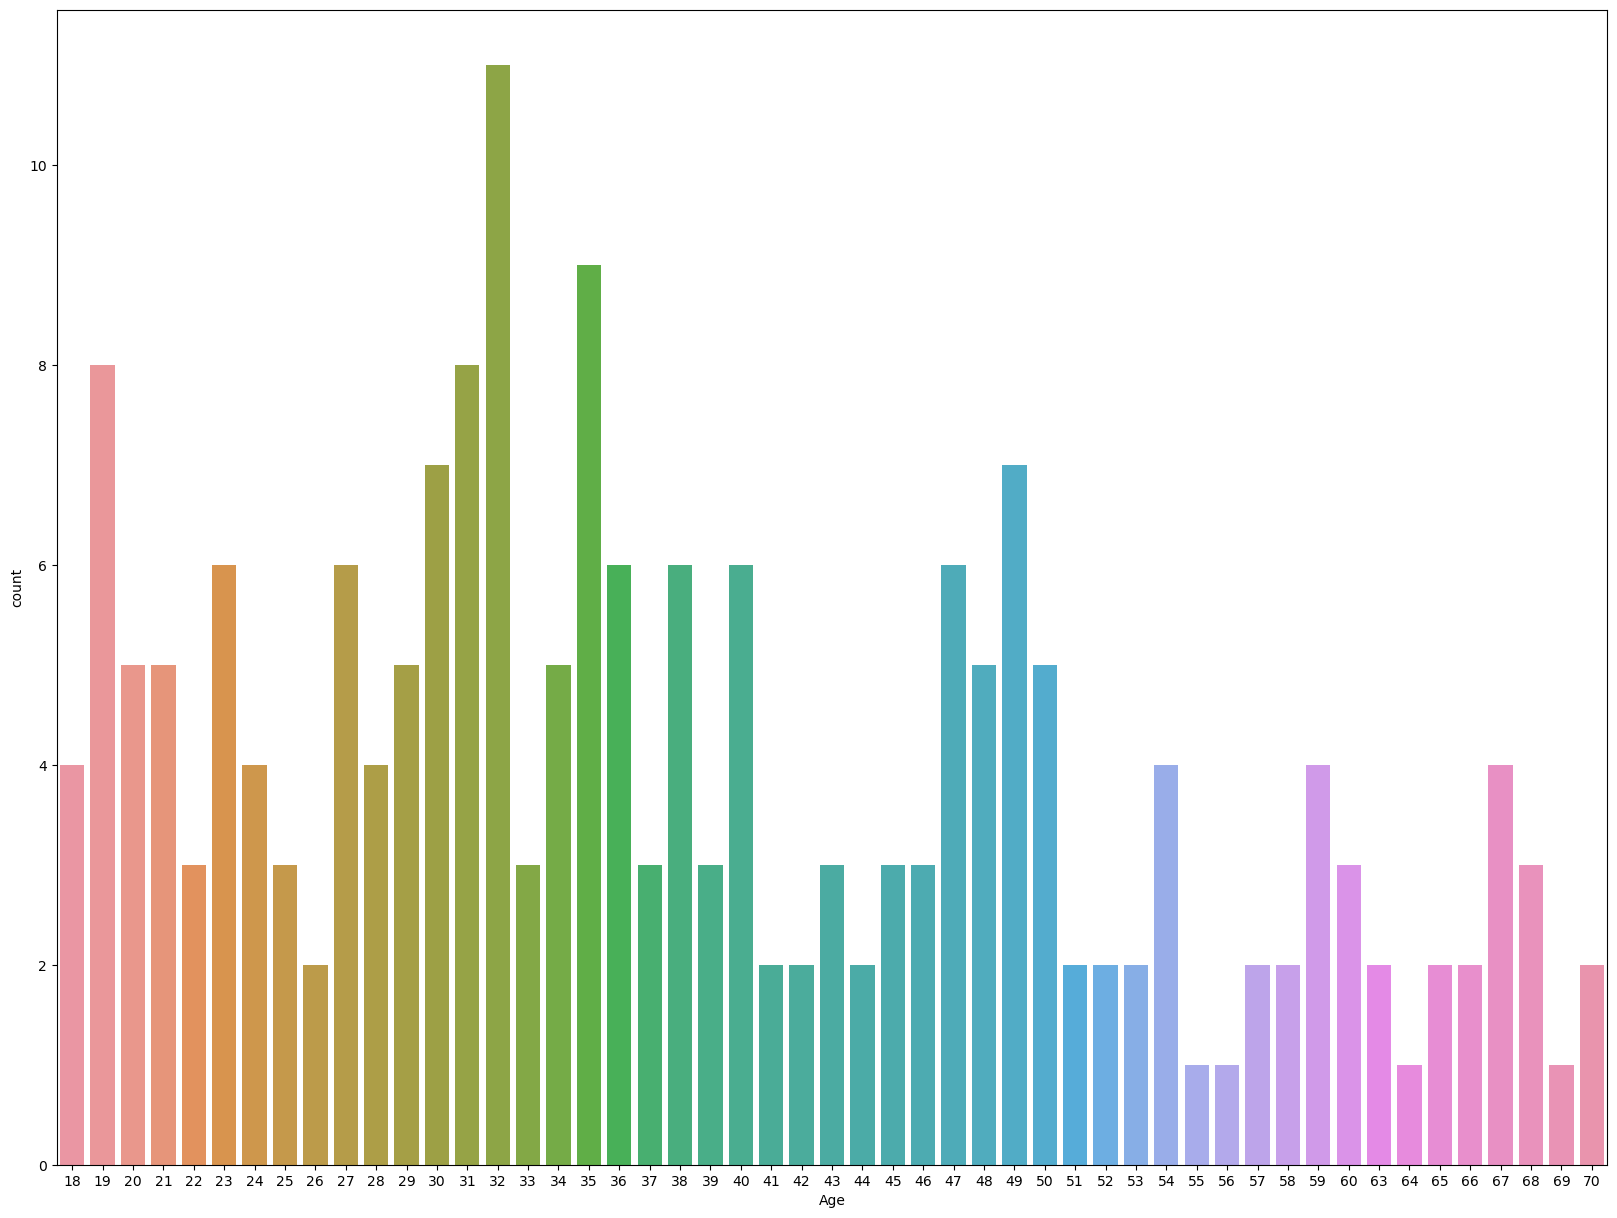

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age')

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


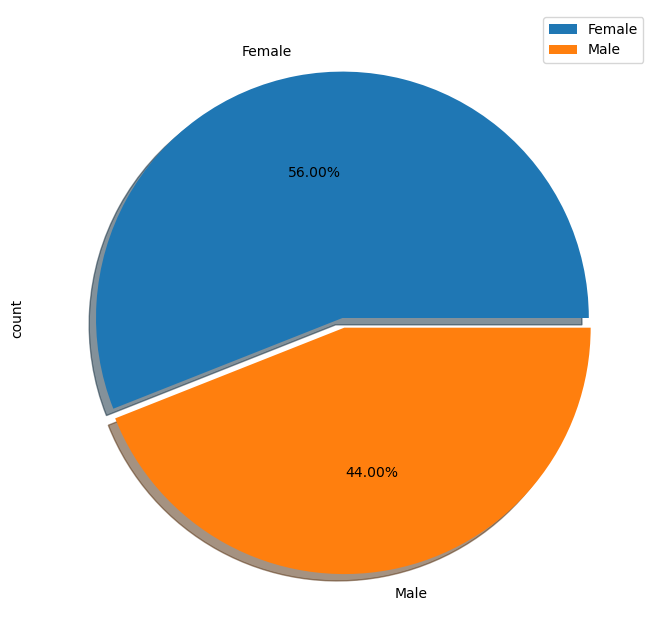

In [14]:
#showing how many % of male and female visits the mall with the help of a plot
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                              explode=(0,0.04))
plt.legend()

* Conclusion

1. No. of females > No. of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

In [15]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


Text(0.5, 1.0, 'Distribution of Annual Income')

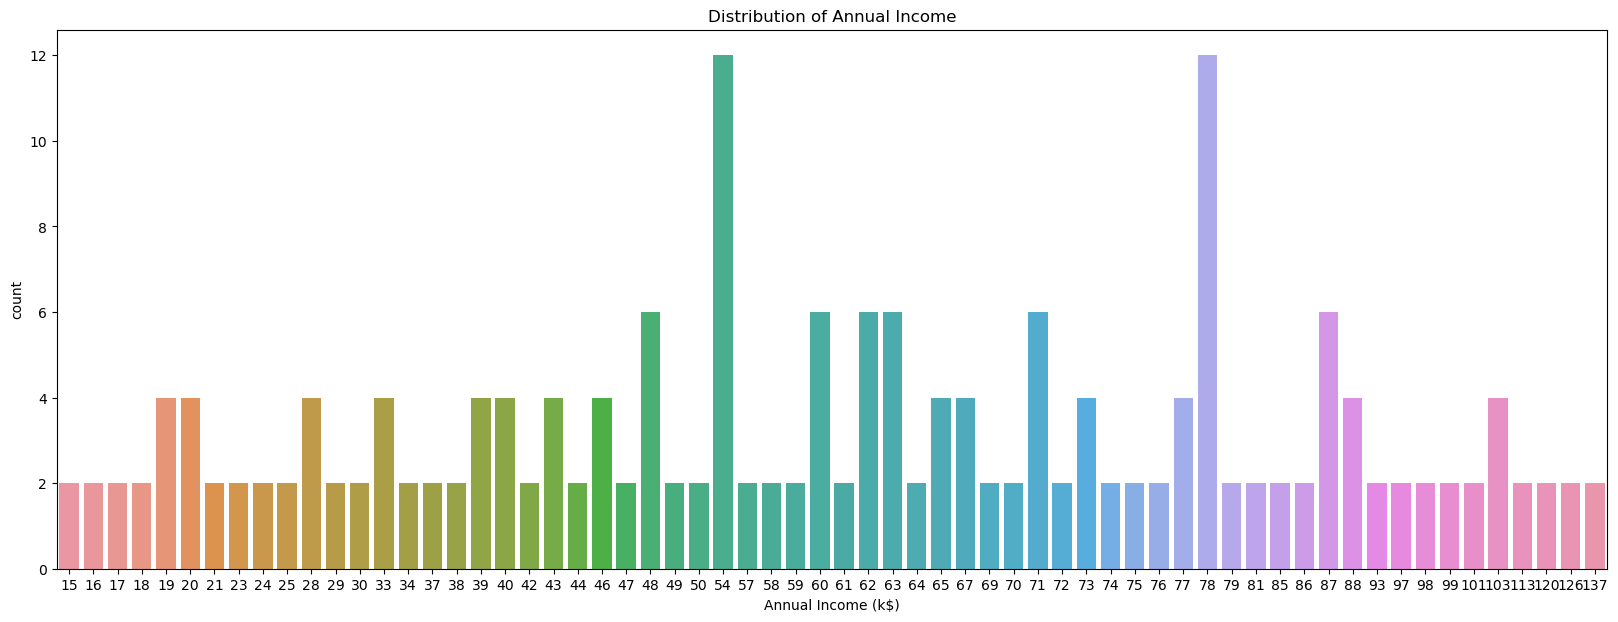

In [23]:
# Distribution of Income
plt.figure(figsize=(20, 7))
sns.countplot(x='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income')


* Conclusions

1. The customers that are having the salary of $54(k) and $78(K), visits the mall most of time

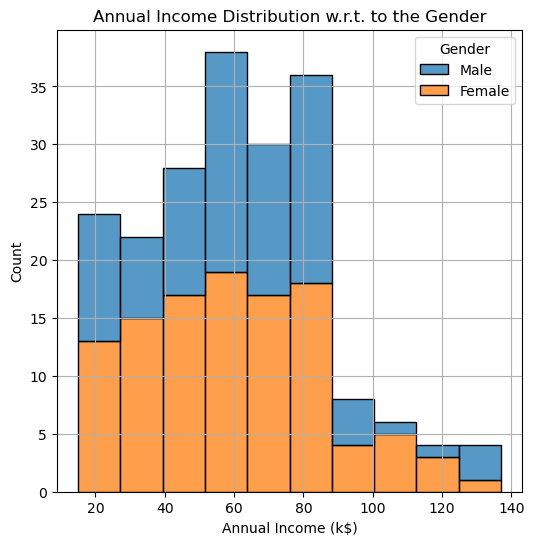

In [24]:
# Show the Annual Income Distribution with respect to the Gender

plt.figure(figsize=(6,6))
sns.histplot(df,x='Annual Income (k$)',hue='Gender', multiple='stack')
plt.title('Annual Income Distribution w.r.t. to the Gender')
plt.grid()

* Conclusion

The histogram provides a visual representation of the annual income distribution with respect to gender, allowing for insights into potential income disparities and informing various decision-making processes.

# Seaborn lmplot

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


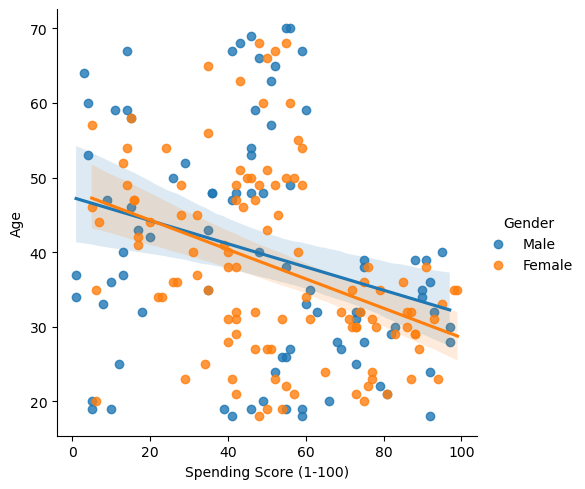

In [26]:
sns.lmplot(data=df,x='Spending Score (1-100)', y='Age', hue='Gender')

# Machine Learning

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [29]:
enc = LabelEncoder()

In [30]:
df.Gender = enc.fit_transform(df.Gender)

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
df.drop('CustomerID', axis=1, inplace=True)

* K-Mean Clustering

In [33]:
ssd = []
# clusters will be 1-10
for i in range(1,11):
  Kmodel = KMeans(n_clusters=i, n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [34]:
ssd

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51167.19736842105,
 44355.31351771352,
 40639.660394660765,
 37895.206575973054]

Text(0.5, 1.0, 'Elbow plot')

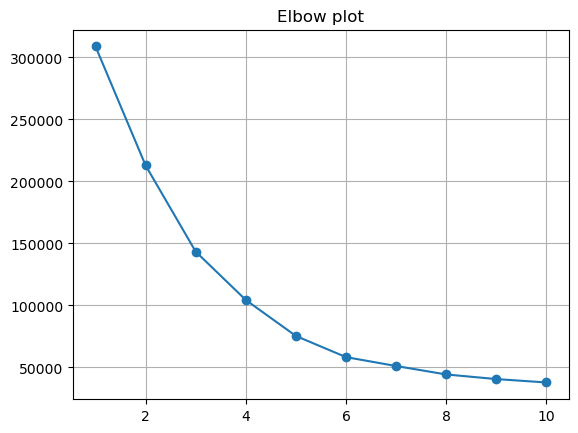

In [35]:
plt.plot(range(1,11), ssd, marker='o')
plt.grid()
plt.title('Elbow plot')

* k=6 because after 6 the curve is becoming linear 
* i.e we can make 6 categories of customers

In [37]:
Kmodel = KMeans(n_clusters=6)

In [38]:
Kmodel.fit(df)
# Kmodel.fit_predict(df)
# Kmodel.predict(df)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [39]:
prediction = Kmodel.predict(df)

In [40]:
prediction

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 4, 0, 5, 2,
       5, 0, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [41]:
len(prediction)

200

In [42]:
Kmodel.cluster_centers_

array([[ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.43181818, 56.34090909, 53.70454545, 49.38636364],
       [ 0.40909091, 44.31818182, 25.77272727, 20.27272727]])

In [43]:
len(Kmodel.cluster_centers_)

6

In [44]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
# to see which customer belongs to which cluster
df['Cluster'] = prediction

In [46]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,0
2,0,20,16,6,5
3,0,23,16,77,0
4,0,31,17,40,5


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

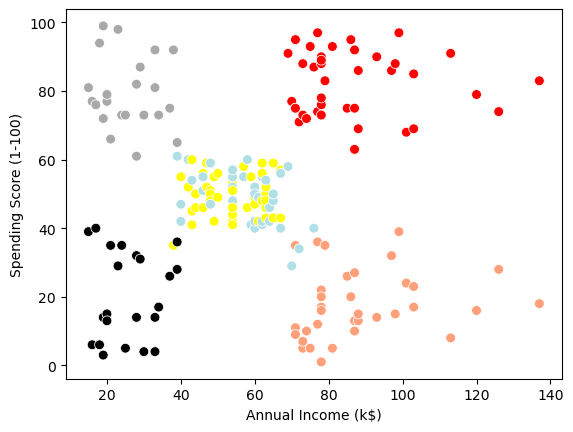

In [47]:
# visualization
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'],
                y = df['Spending Score (1-100)'],
                c=color[Kmodel.labels_],
                s=50)

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
var = linkage(df, method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [355.0, 355.0, 365

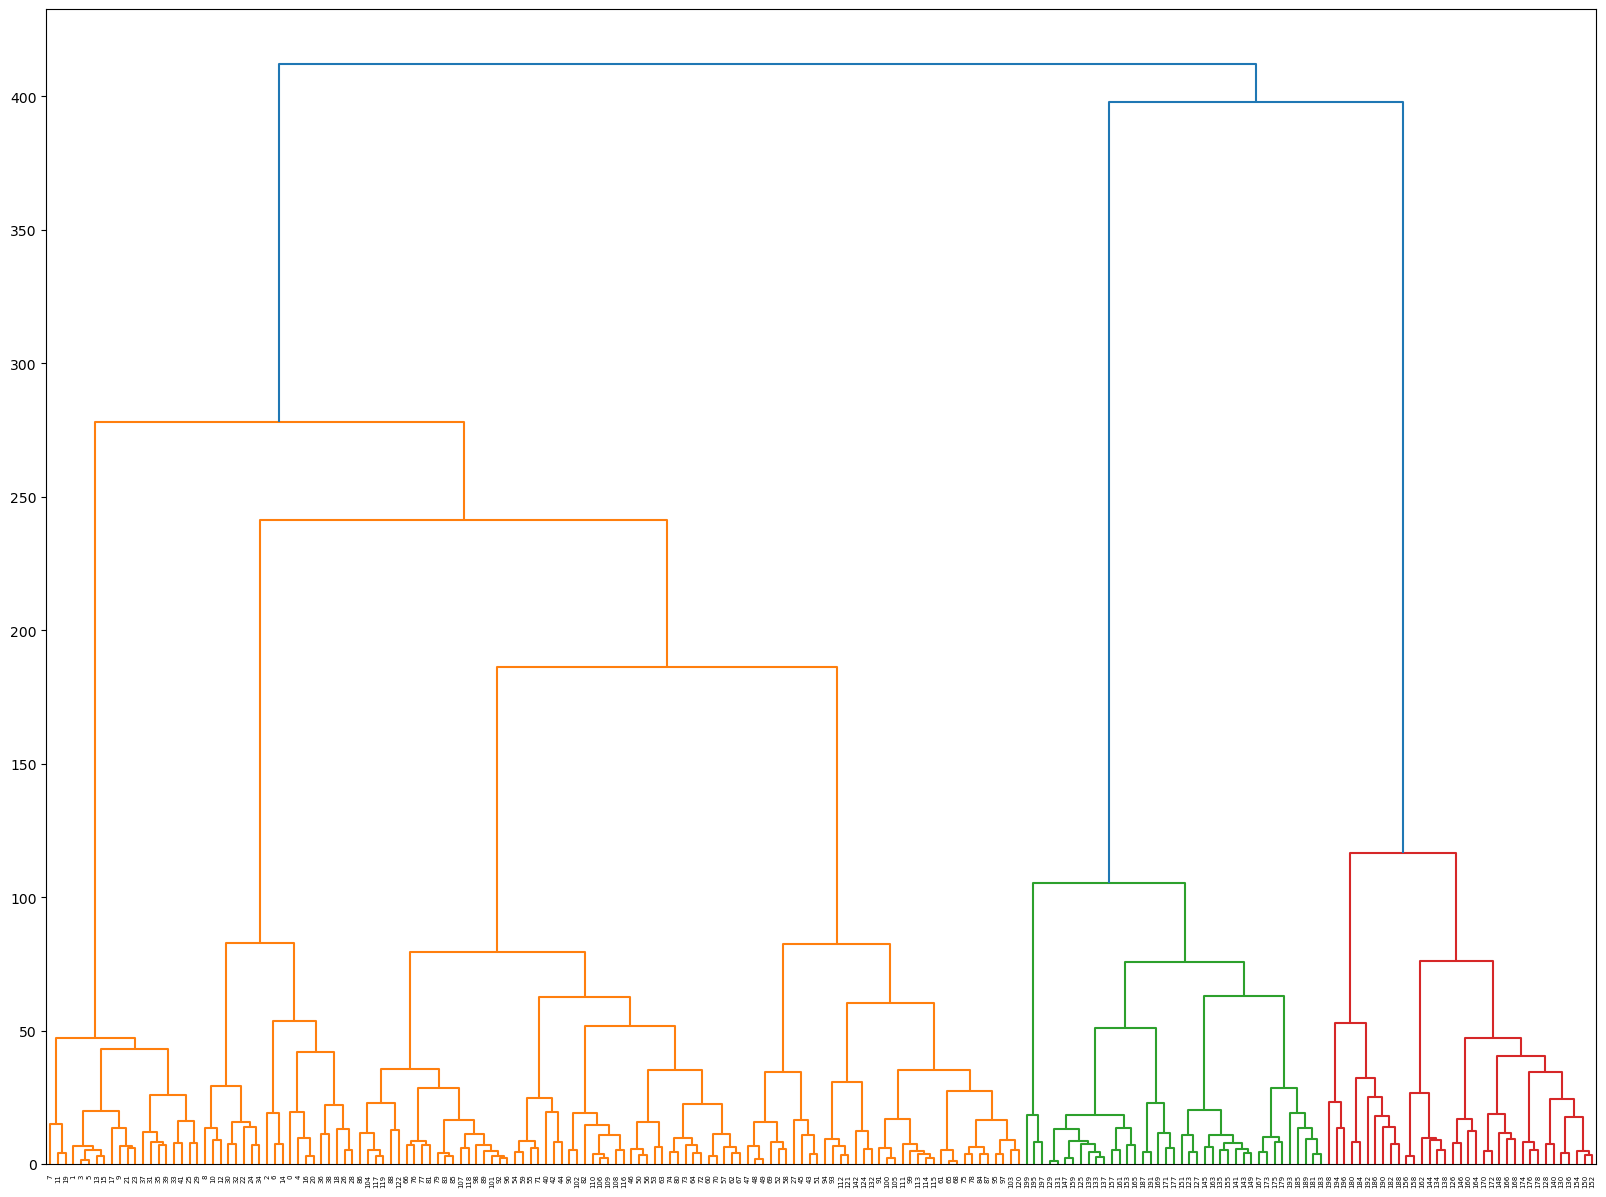

In [50]:
plt.figure(figsize=(20,15))
dendrogram(var, leaf_rotation=90)

In [54]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [66]:
# DBSCAN clustering
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
dbscan_model.fit(df)
df['DBSCAN_Cluster'] = dbscan_model.labels_



In [67]:
dbscan_labels = df['DBSCAN_Cluster']
dbscan_labels

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: DBSCAN_Cluster, Length: 200, dtype: int64

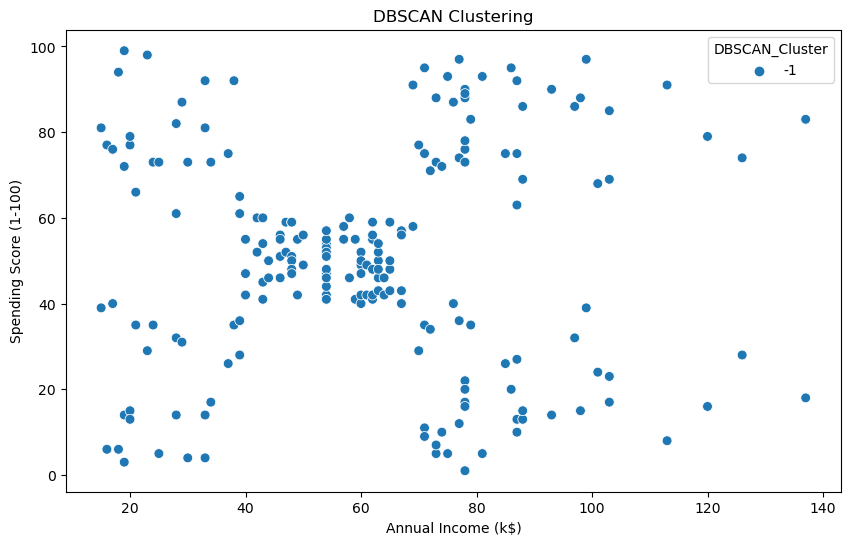

In [68]:
# Visualize DBSCAN clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='DBSCAN_Cluster',
                data=df,
                palette='tab10',
                legend='full',
                s=50)
plt.title('DBSCAN Clustering')
plt.show()